In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fashion = tf.keras.datasets.fashion_mnist
(x_train,y_train), (x_test,y_test) = fashion.load_data()
x_train = x_train / 255.
x_test = x_test / 255.
x_train, x_test = x_train[...,tf.newaxis], x_test[...,tf.newaxis]

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train,y_train)).shuffle(10000).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((x_test,y_test))

In [33]:

model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32,3,input_shape=(28,28,1),activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.MaxPool2D((3,2)),
        tf.keras.layers.Dropout(.15),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128,activation='relu'),
        tf.keras.layers.Dense(10,activation='softmax')])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(train_ds,epochs=10)
predictions = model.predict_classes(x_test)

Epoch 1/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4447 - accuracy: 0.8486
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3304 - accuracy: 0.8868
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2943 - accuracy: 0.8990
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2739 - accuracy: 0.9049
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2501 - accuracy: 0.9133
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2378 - accuracy: 0.9171
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2225 - accuracy: 0.9234
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2123 - accuracy: 0.9280
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2018 - accuracy: 0.9311
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - l

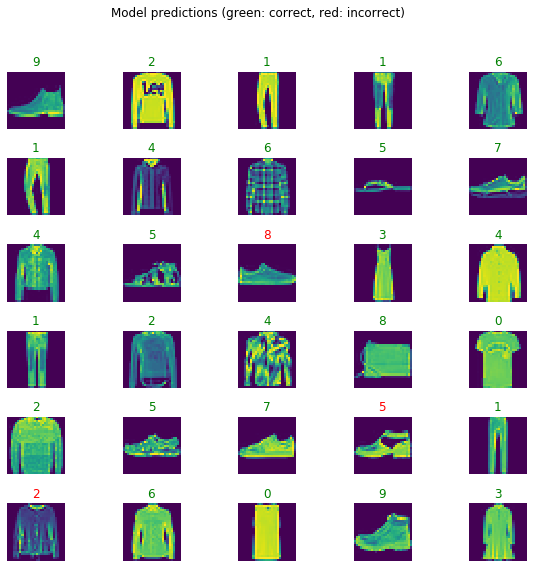

In [54]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(x_test[n,:,:,0])
  color = "green" if predictions[n] == y_test[n] else "red"
  plt.title(predictions[n], color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

In [46]:
correct = np.nonzero(predictions==y_test)[0]
incorrect = np.nonzero(predictions!=y_test)[0]


from sklearn.metrics import classification_report

target_names = ["Class {}".format(i) for i in range(10)]

print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.83      0.91      0.87      1000
     Class 1       0.98      0.99      0.98      1000
     Class 2       0.82      0.89      0.85      1000
     Class 3       0.92      0.92      0.92      1000
     Class 4       0.84      0.86      0.85      1000
     Class 5       0.99      0.96      0.98      1000
     Class 6       0.82      0.66      0.73      1000
     Class 7       0.95      0.96      0.95      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.96      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



<Figure size 432x288 with 0 Axes>

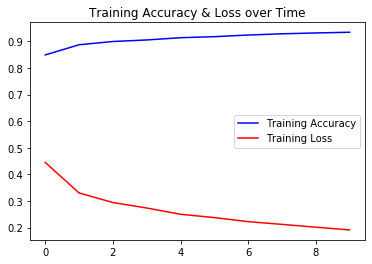

<Figure size 432x288 with 0 Axes>

In [53]:
accuracy = history.history['accuracy']

loss = history.history['loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.title("Training Accuracy & Loss over Time")
plt.legend()
plt.figure()